# Проект: Исследовательский анализ данных

Задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

Ознакомимся с данными

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим описание столбцов

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы каждого поля

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

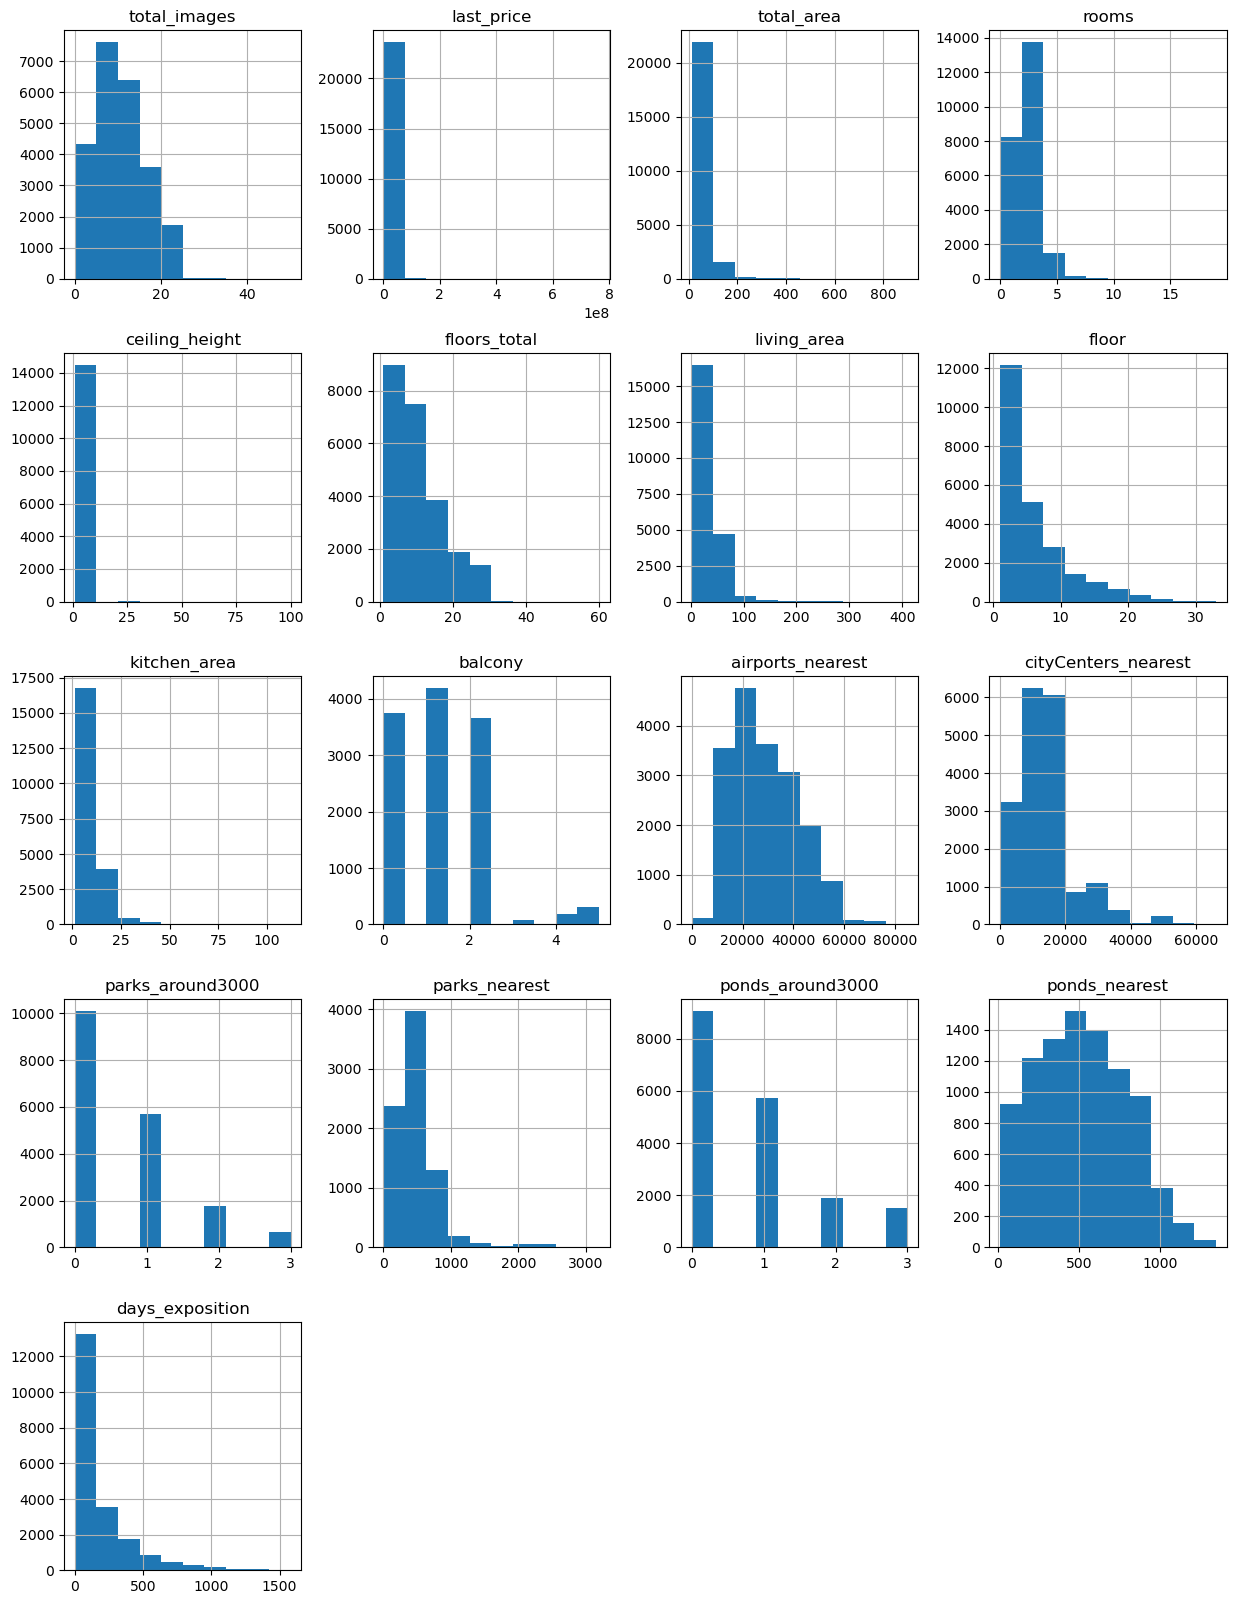

In [5]:
df.hist(figsize=(15, 20))

### Шаг 2. Предобработка данных

#### Пропуски

Посмотрим в каких полях содержаться пропущенные значения

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Поля, в которых можно заполнить пропущенные значения
- balcony если продавец не указал число балконов, то, скорее всего, в его квартире их нет и пропущенные значения можно заменить на 0
- parks_around3000 если пропущено число парков, то, скорее всего, поблизости их нет и пропущенные значения можно заменить на 0
- ponds_around3000 если пропущено число водоемов поблизости, то, скорее всего, поблизости их нет и пропущенные значения можно заменить на 0
- is_apartment вероятнее всего, квартиры с пропущенными значениями не являются аппартаментами и продавец просто это не указывал, поэтому проппуски можно заполнить отрицательным значением

In [7]:
df['balcony'] = df['balcony'].fillna(value=0)
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)
df['is_apartment'] = df['is_apartment'].fillna(value=False)

Поля, которые необходимо преобразовать в другой тип
- first_day_exposition (object в datetime)
- is_apartment (object в bool) потому что поле может принимать только два значения
- balcony (float в int, потому что количество балконов целое число)
- parks_around3000 (float в int, потому что количество парков поблизости целое число)
- ponds_around3000 (float в int, потому что количество водоемов поблизости целое число)

In [8]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S"
)
df['is_apartment'] = df['is_apartment'].astype('bool')
df['balcony'] = df['balcony'].astype('int64')
df['parks_around3000'] = df['parks_around3000'].astype('int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('int64')

#### Неявные дубликаты

Изучим уникальные значения в столбце с названиями местоположения

In [9]:
df["locality_name"].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видно, что содержится много дубликатов, причиной которых является использвание символов 'е' и 'ё'. Также есть дубликаты из-за разного указания статуса населенного пункта, например, «поселок Рябово» и «поселок городского типа Рябово». Чтобы исключить это, добавим новый столбец "clean_name", где будет содержатся только название населенных пунктов

In [10]:
stopwords = ['городской', 'городского', 'типа', 'посёлок', 'коттеджный',
             'поселок', 'деревня', 'при', 'железнодорожной', 'станции',
            'садоводческое', 'некоммерческое', 'товарищество', 'садовое', 'село']
new_words = []
stopword_re = re.compile("|".join(r"\b%s\b" % re.escape(word) for word in stopwords))
df["clean_name"] = df["locality_name"].replace(stopword_re, "")
df["clean_name"] = df[~df["clean_name"].isna()]["clean_name"].str.strip()

#### Аномальные значения

Проанализировав гистограммы, можем предположить и исследовать на аномальные значения следующие поля:
- last_price
- total_area
- rooms
- ceiling_height
- balcony

Проанализируем квартиры с высокими ценами на аномальность

In [11]:
df[df["last_price"] > 2e8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_name
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,...,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0,Санкт-Петербург
5893,3,230000000.0,500.0,2017-05-31,6,NaN,7.0,NaN,7,False,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50.0,Санкт-Петербург
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,...,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0,Санкт-Петербург
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,199.0,Санкт-Петербург
14706,15,401300000.0,401.0,2016-02-20,5,NaN,9.0,204.0,9,False,...,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0,Санкт-Петербург
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0,Санкт-Петербург
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7.0,182.8,4,False,...,0,Санкт-Петербург,33143.0,6235.0,3,400.0,3,140.0,249.0,Санкт-Петербург
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,Санкт-Петербург
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,False,...,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,NaN,Санкт-Петербург


Из выборки видно, что вероятнее всего это элитные квартиры, так как имеют большую площадь с высокими потолками, находятся в черте города. Однозначно сказать, что это выбросы нельзя, поэтому пока оставим как есть

Проанализируем квартиры с большими площадями на анамальность

In [12]:
df[df["total_area"] > 500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_name
3117,19,140000000.0,631.0,2019-03-30,7,NaN,5.0,NaN,5,False,...,0,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,Санкт-Петербург
4237,1,50000000.0,517.0,2017-10-14,7,NaN,4.0,332.0,3,False,...,0,Санкт-Петербург,22835.0,1847.0,2,477.0,2,540.0,NaN,Санкт-Петербург
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0,Санкт-Петербург
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7.0,301.5,7,True,...,1,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,1078.0,Санкт-Петербург
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,...,1,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,Санкт-Петербург
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0,Санкт-Петербург
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,Санкт-Петербург


С площадью такая же картина, как и с ценой. Оставим пока как есть

Посмотрим на комнаты. Количество квартир с больше чем 7 комнат незначительное, да и варианты с бОльшим количеством комнат выглядят очень подозрительно, поэтому решено создать дополнительный столбец и объединить эти квартиры в группу 7+ комнат

In [13]:
df["rooms_count_group"] = df["rooms"]
df['rooms_count_group'] = df['rooms_count_group'].astype('str')
df.loc[(df["rooms"] >= 7), 'rooms_count_group'] = '7+'

Проанализируем высоту потолков. Найдем и удалим редкие и выбивающиеся значения. Потолки меньше 2.4-х и больше 32-х метров, а также в диапазоне (6, 20)

In [14]:
df.loc[(df["ceiling_height"] < 2.4) | (df["ceiling_height"] > 32), 'ceiling_height'] = None
df.loc[(df["ceiling_height"] >= 6) & (df["ceiling_height"] <= 24), 'ceiling_height'] = None

Поправим значения в диапазоне 24 - 32, вероятнее всего это диапазон 2.4 - 3.2

In [15]:
df.loc[(df["ceiling_height"] > 24), 'ceiling_height'] = df.loc[(df['ceiling_height'] > 24), 'ceiling_height'] / 10

### Шаг 3. Добавьте в таблицу новые столбцы

Цена одного квадратного метра

In [16]:
df['price_per_meter'] = df['last_price'] / df['total_area']

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [17]:
df['weekday'] = df['first_day_exposition'].dt.weekday

Месяц публикации объявления

In [18]:
df['month'] = df['first_day_exposition'].dt.month

Год публикации объявления

In [19]:
df['year'] = df['first_day_exposition'].dt.year

Тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [20]:
def floor_group(data):
    """
    Возвращает тип этажа квартиры
    """
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    return 'другой' 

df['floor_group'] = df.apply(floor_group, axis=1)

Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [21]:
df["cityCenters_nearest_km"] = (df["cityCenters_nearest"] / 1000).round()

### Шаг 4. Проведите исследовательский анализ данных:

#### Общая площадь

<AxesSubplot:>

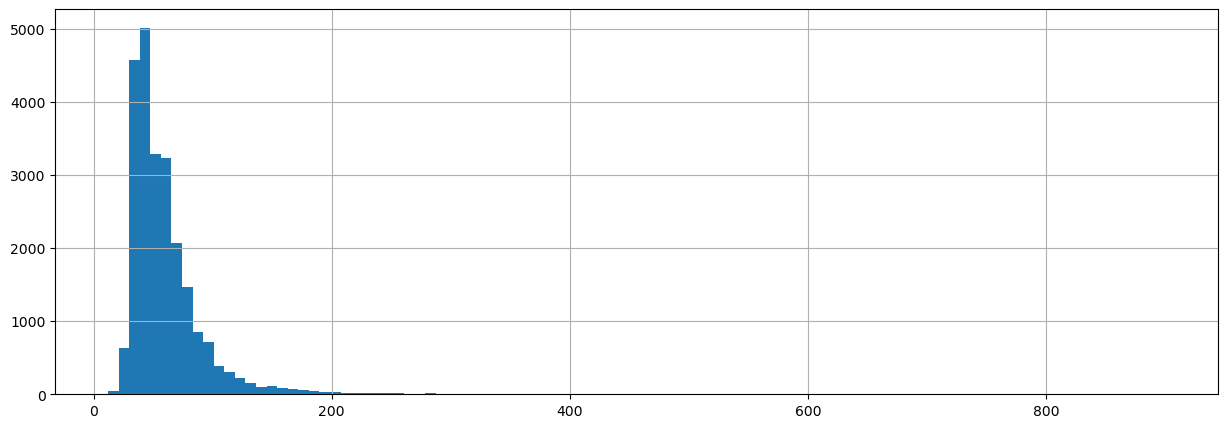

In [22]:
df['total_area'].hist(bins=100, figsize=(15, 5))

Здесь и далее, будем исключать из графика большие редкие значения, чтобы видеть более подробно картину распределения в наиболее частых случаях

<AxesSubplot:>

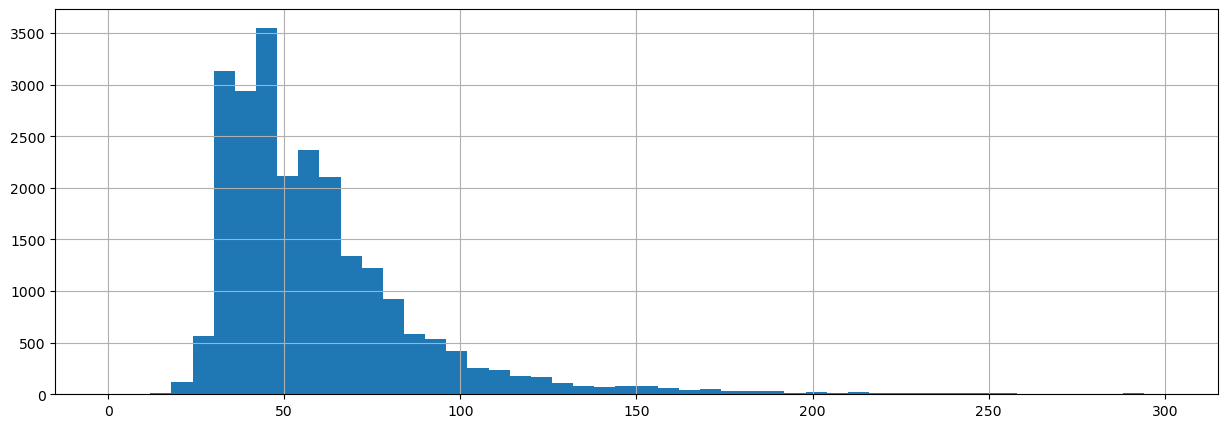

In [23]:
df['total_area'].hist(bins=50, figsize=(15, 5), range=(0, 300))

In [24]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Среднее значение - 60, медиана - 52.

#### Жилая площадь

<AxesSubplot:>

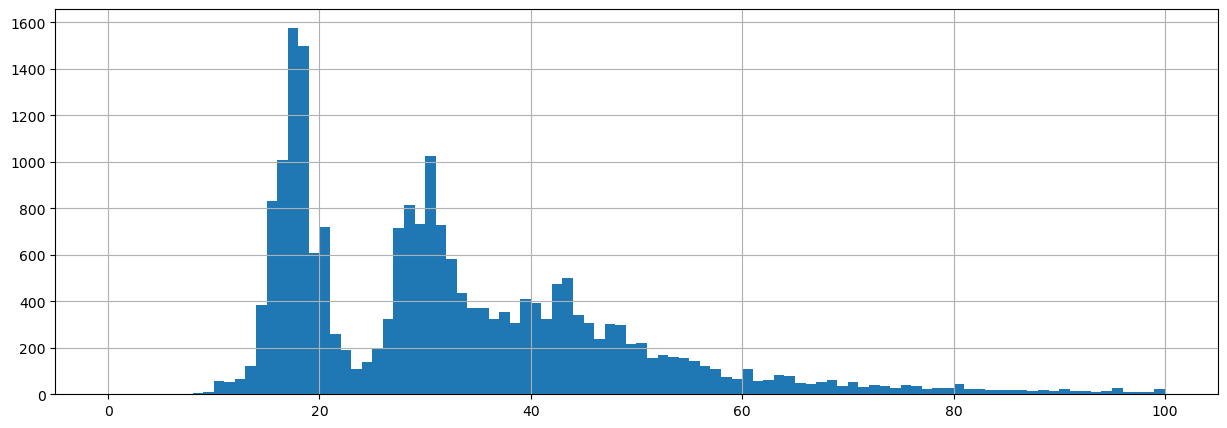

In [25]:
df['living_area'].hist(bins=100, figsize=(15, 5), range=(0, 100))

Неожиданно, в распределении видим несколько пиков. Можно предположить, что эти пики коррелируют с количеством комнат. Проверим, построим гистограмму, разделив цветами квартиры с разным количеством комнат

<AxesSubplot:ylabel='Frequency'>

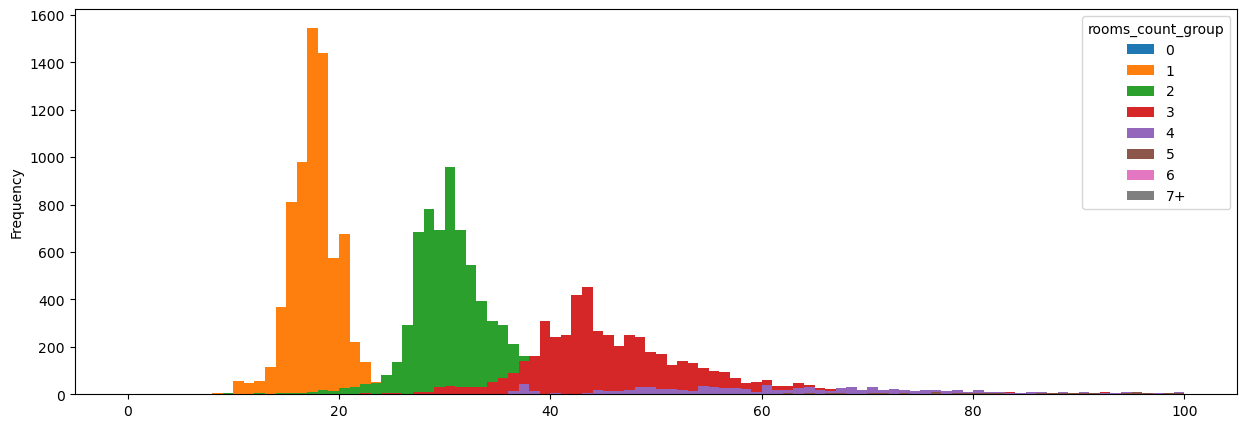

In [26]:
df.pivot(columns='rooms_count_group', values='living_area').plot.hist(bins=100, figsize=(15, 5), range=(0, 100))

In [27]:
print(df[df['rooms_count_group'] == '1']['living_area'].describe())
print(df[df['rooms_count_group'] == '2']['living_area'].describe())
print(df[df['rooms_count_group'] == '3']['living_area'].describe())

count    7388.000000
mean       17.893552
std         3.448422
min         3.000000
25%        16.000000
50%        17.600000
75%        19.000000
max        60.000000
Name: living_area, dtype: float64
count    7296.000000
mean       31.736849
std         6.129991
min         2.000000
25%        28.100000
50%        30.500000
75%        33.900000
max        99.500000
Name: living_area, dtype: float64
count    5366.000000
mean       47.387941
std        11.219835
min         3.000000
25%        41.000000
50%        45.000000
75%        51.300000
max       170.800000
Name: living_area, dtype: float64


Действительно, каждый пик - это отдельное распределение для квартир с разной "комнатностью". Пик для 1, 2-х и 3-х комнатные квартиры приходится на 18, 30 и 45 кв. м. соответсвенно. Однако в распределении с общей площадью, такая зависимость прослеживается слабо.

#### Площадь кухни

<AxesSubplot:>

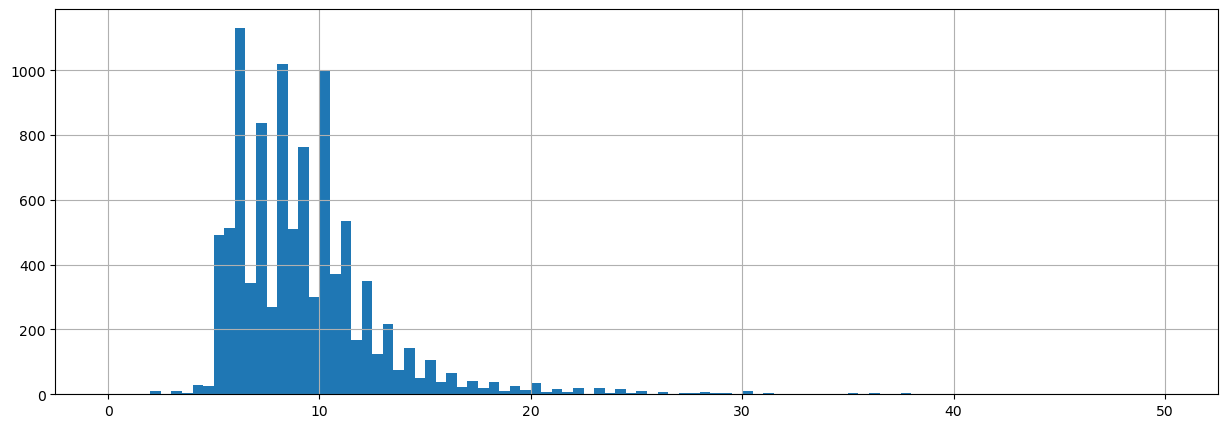

In [28]:
df[df['living_area'] < 30]['kitchen_area'].hist(bins=100, figsize=(15, 5), range=(0, 50))

Распределение выглядит довольно странно, зубчато. Корреляции с комнатностью, этажностью найдено не было. Вероятно это особенности выгрузки

#### Цена объекта

<AxesSubplot:>

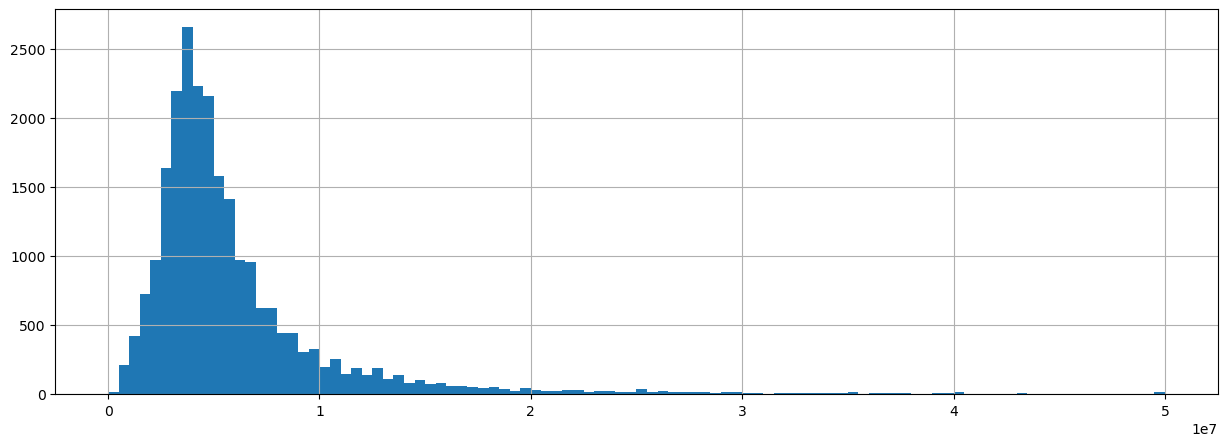

In [29]:
df['last_price'].hist(bins=100, figsize=(15, 5), range=(0, 5e7))

In [30]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В среднем квартиры продаются за 6,5 млн., однако медианой является значение в 4,65 млн.

#### Количество комнат

<AxesSubplot:>

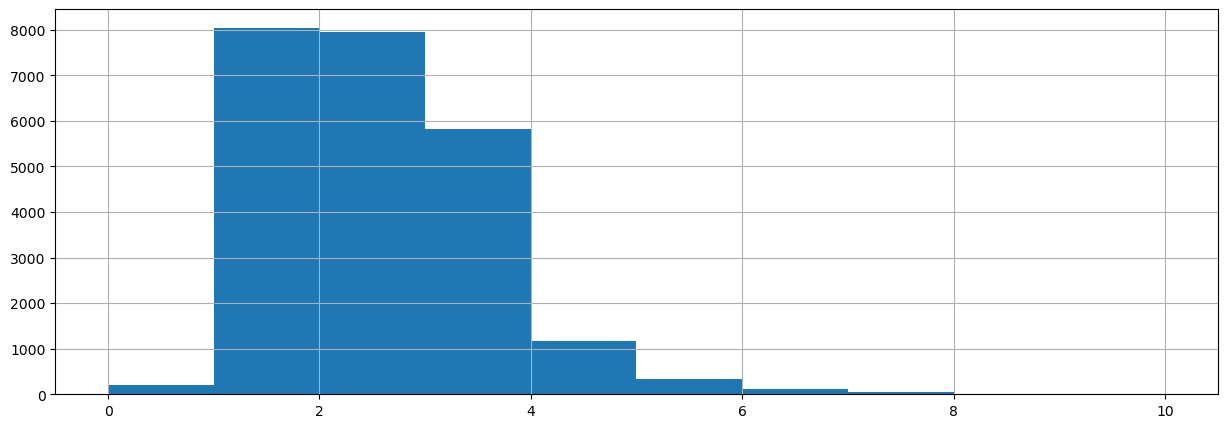

In [31]:
df['rooms'].hist(bins=10, figsize=(15, 5), range=(0, 10))

Пик приходится на 1 и 2-х комнатные квартиры. Так и есть, это самые популярные квартиры

#### Высота потолков

<AxesSubplot:>

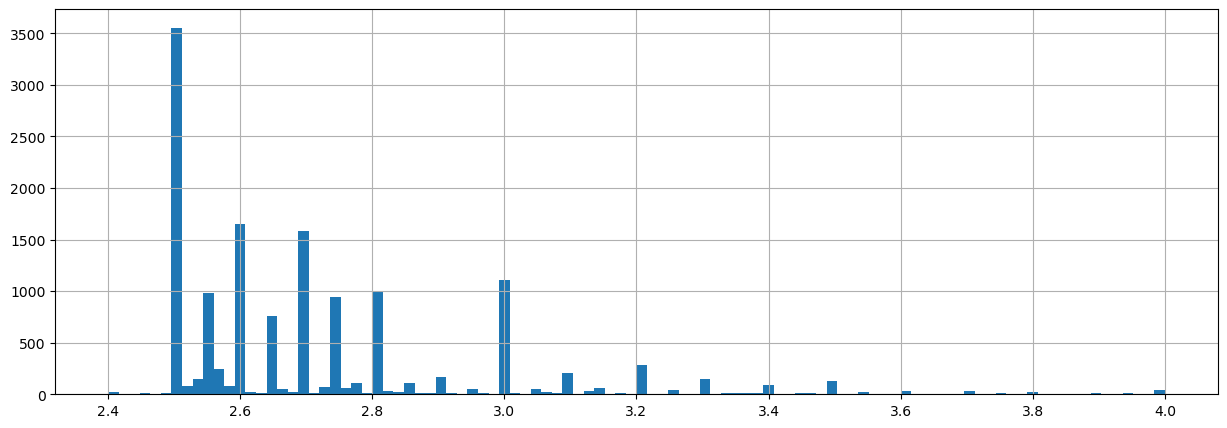

In [32]:
df['ceiling_height'].hist(bins=100, figsize=(15, 5), range=(2.4, 4))

Набляюдаем несколько вершин. Эти пики сооответсвуют стандартам потолков 2.5, 2.6, 2.7, 2.8, 3 и 3.2 метра

#### Этаж квартиры

<AxesSubplot:>

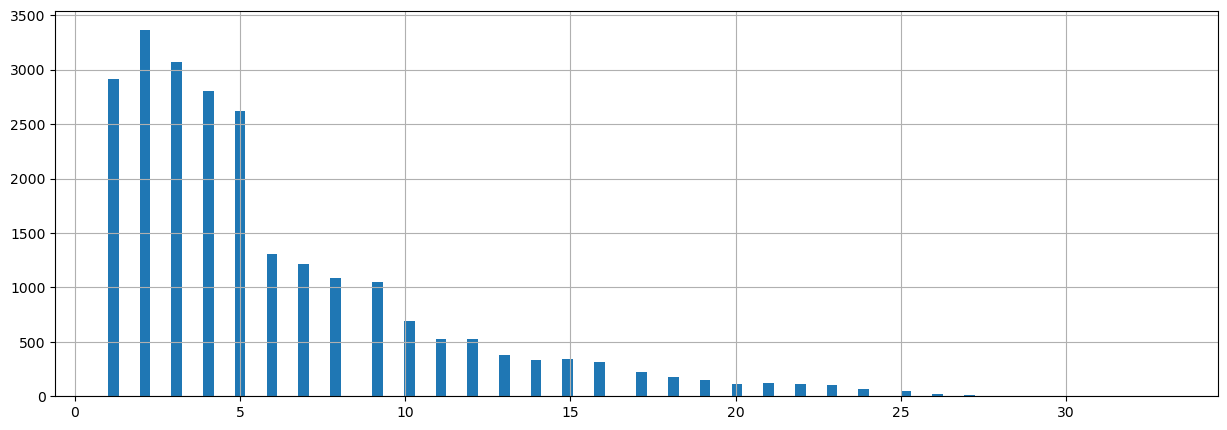

In [33]:
df['floor'].hist(bins=100, figsize=(15, 5))

Вообще распределение этажа квартиры ожидалось равномерным. Но корректировки вносит этажность дома. Попробуем разделить гистограмму по этому показателю. Во избежание долгих расчетов, ограничемся 16-ю этажами.

<AxesSubplot:ylabel='Frequency'>

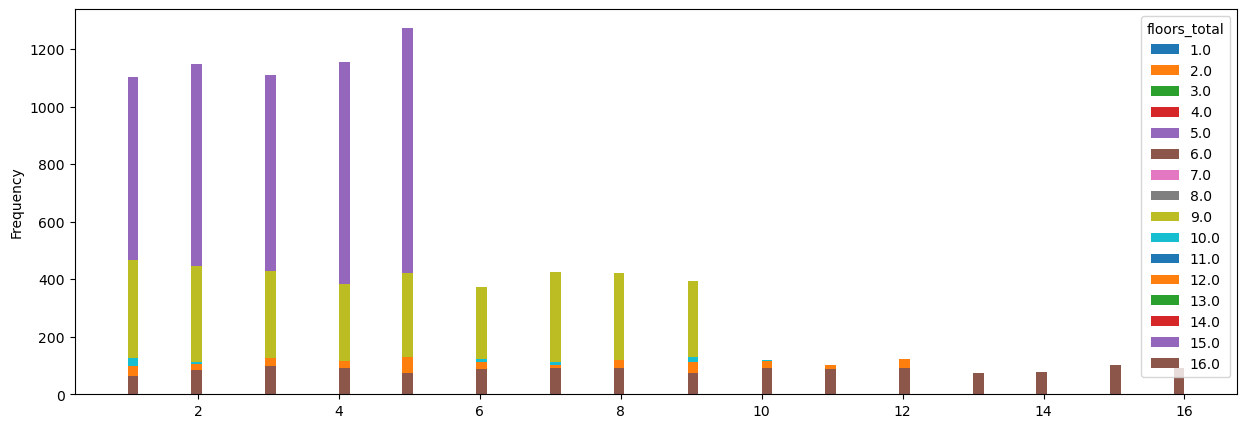

In [34]:
df[df['floors_total'] <= 16].pivot(columns='floors_total', values='floor').plot.hist(bins=100, figsize=(15, 5))

Действительно, распределение получилось равномерным для каждой этажности

#### Тип этажа квартиры («первый», «последний», «другой»)

<AxesSubplot:>

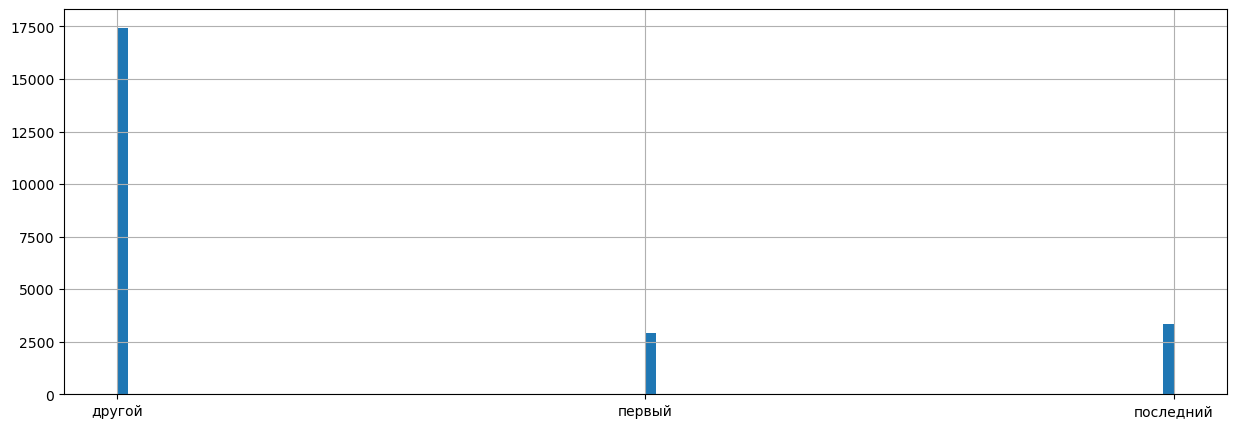

In [35]:
df['floor_group'].hist(bins=100, figsize=(15, 5))

"Другой" этаж встречается чаще чем первый и последний, ожидаемо...

#### Общее количество этажей в доме

<AxesSubplot:>

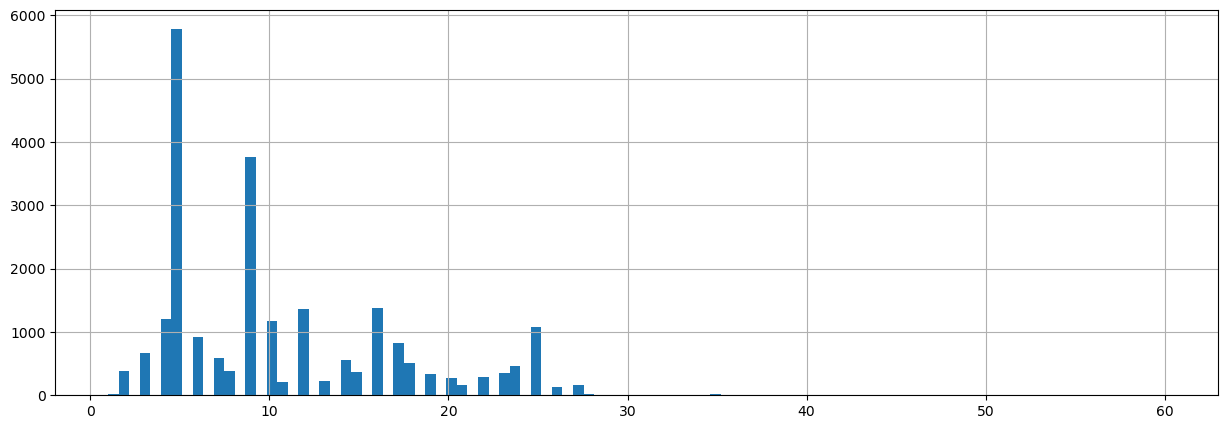

In [36]:
df['floors_total'].hist(bins=100, figsize=(15, 5))

Здесь видим несколько пиков. Объясняется это тем, что какие-то типовые дома встречаются чаще, чем другие, напрмер, это 5-ти, 9-ти, 16-ти и 25-ти этажки.

#### Расстояние до центра города в метрах

<AxesSubplot:>

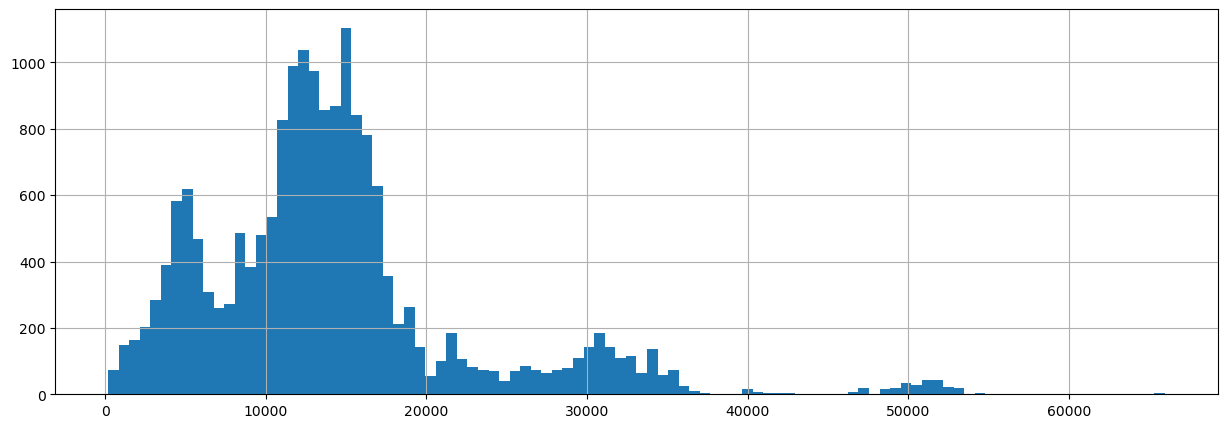

In [37]:
df['cityCenters_nearest'].hist(bins=100, figsize=(15, 5))

In [38]:
df['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

График не очень показательный, потому что это выборка из нескольких городов. В среднем это 14191 метр, а медиана 13098

#### Расстояние до ближайшего аэропорта

<AxesSubplot:>

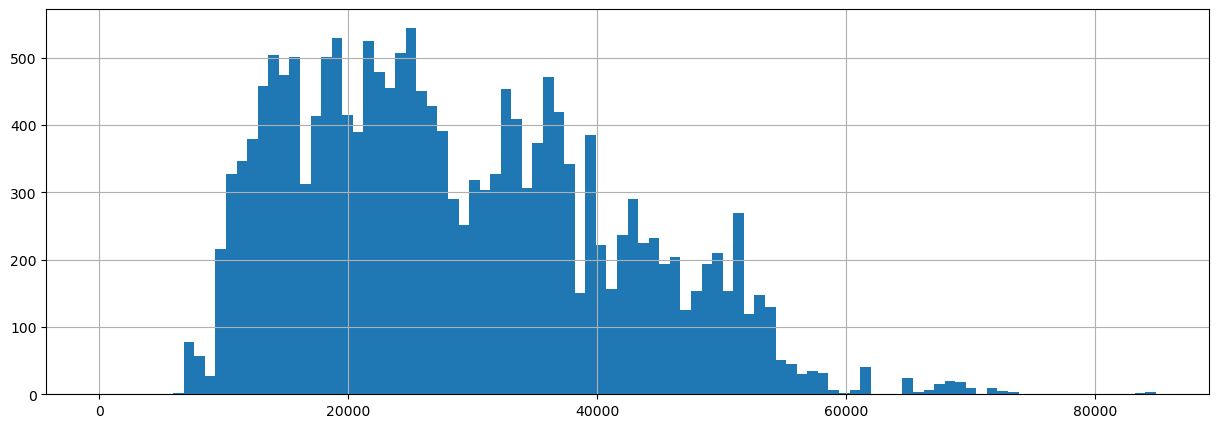

In [39]:
df['airports_nearest'].hist(bins=100, figsize=(15, 5))

In [40]:
df['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

В среднем это 28793 метр, а медиана 26726

#### Расстояние до ближайшего парка

<AxesSubplot:>

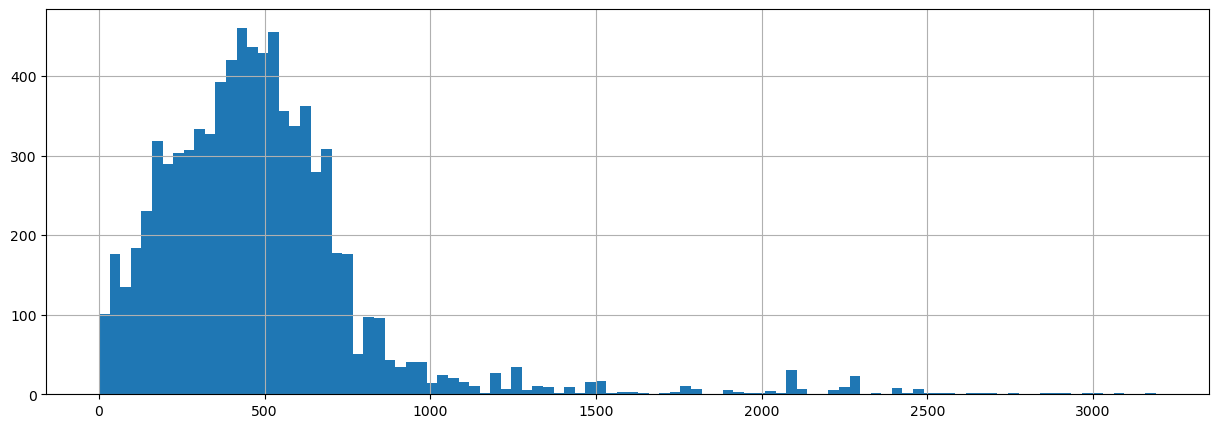

In [41]:
df['parks_nearest'].hist(bins=100, figsize=(15, 5))

In [42]:
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

В среднем это 490 метр, а медиана 455. С учетом того, что третий квартиль составляет 612 метров, можно сказать, что в принципе большинство квартир находятся в пешей доступности от парков

#### День и месяц публикации объявления

<AxesSubplot:>

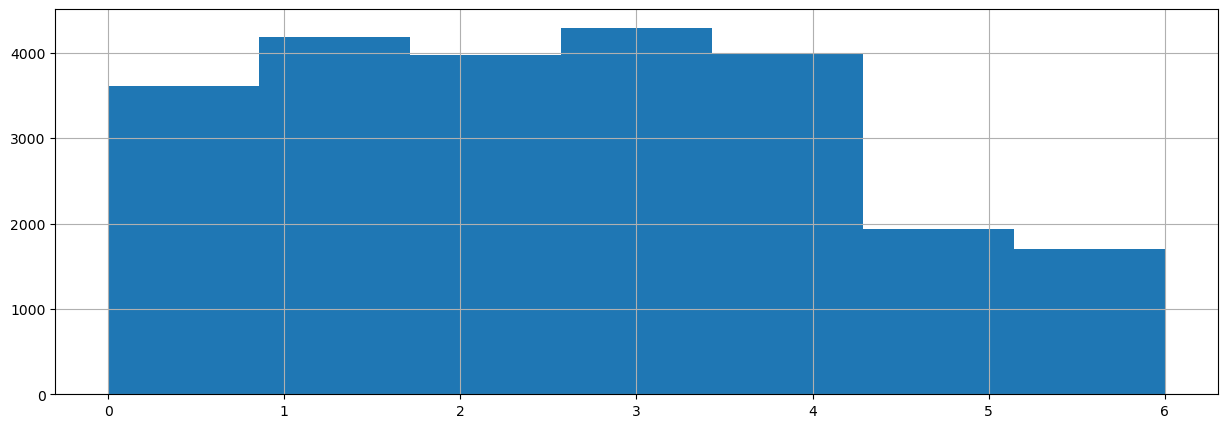

In [43]:
df['weekday'].hist(bins=7, figsize=(15, 5))

Объявления в выходные публикуются реже чем в будни. Думаю связано с тем, что продажу квартиры чаще доверяют риелторам, чем собственнники занимаются самостоятельной продажей. Соответственно, риелторы публикуют объявления в рабочее время

<AxesSubplot:>

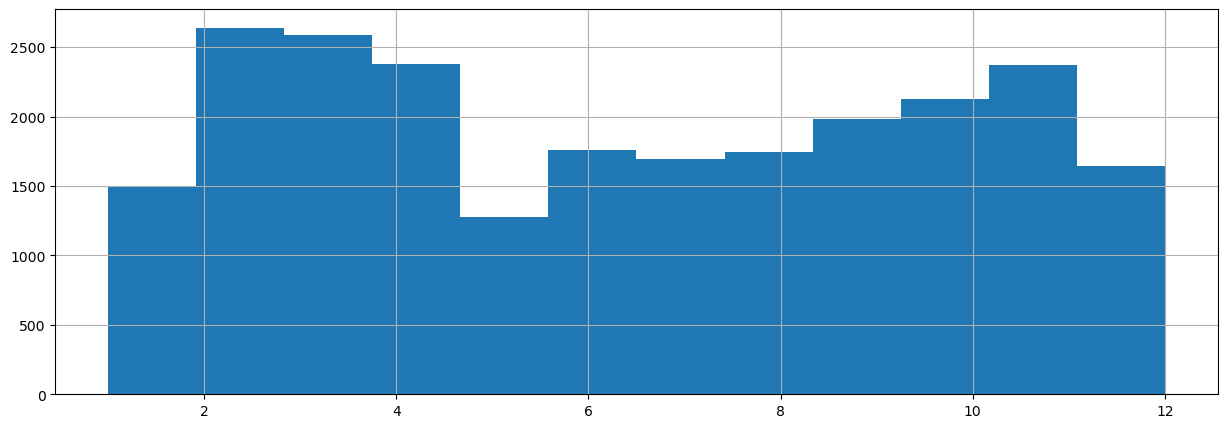

In [44]:
df['month'].hist(bins=12, figsize=(15, 5))

Заметны просадки в январе, мае и декабре. Это месяца с праздничными днями. Больше всего объявлений приходится на весну.

Посмотрим как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

<AxesSubplot:>

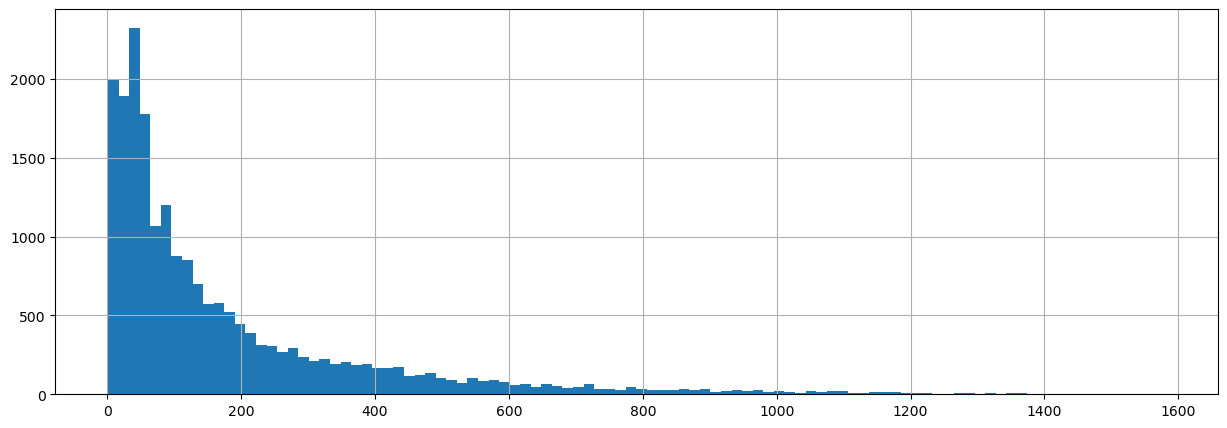

In [45]:
df['days_exposition'].hist(bins=100, figsize=(15, 5))

In [46]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры продаются за 180 дней, однако медианой является значение в 95 дней. Быстрыми можно назвать квартиры которые были проданы в первом квартиле (до 45 дней), а небычайно долгими в 3-м (более 232 дней)

#### Зависимость цены квартиры от общей площади:

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

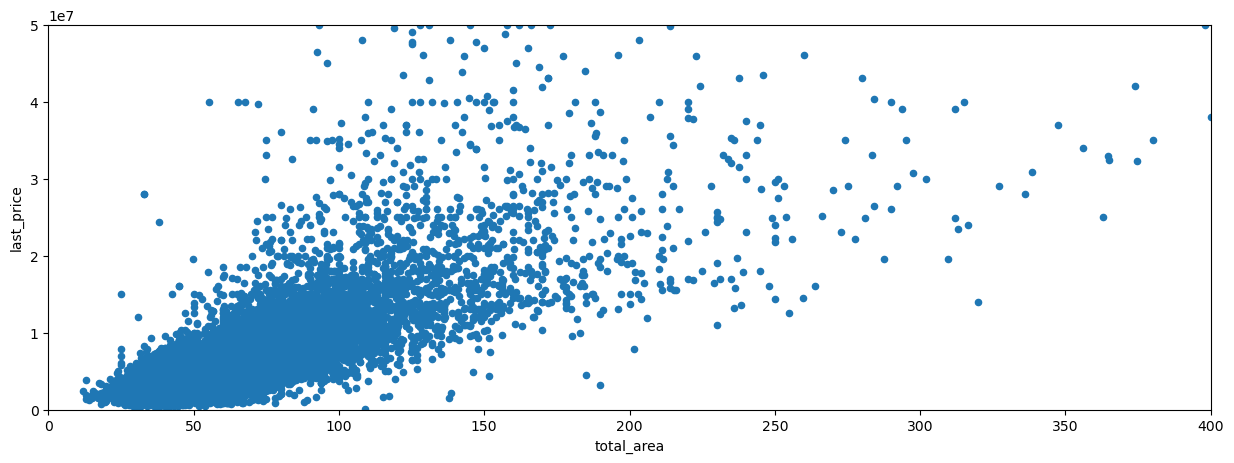

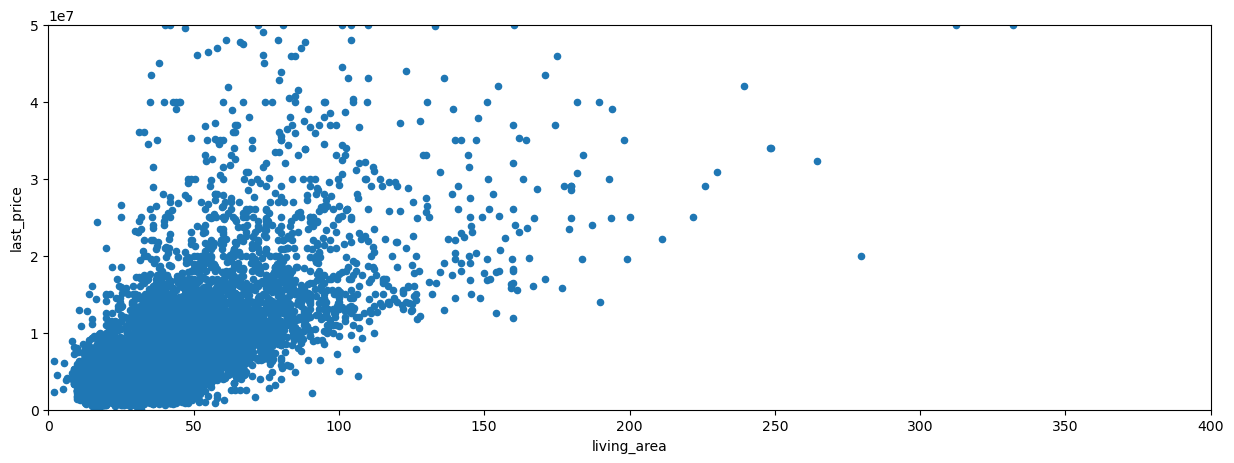

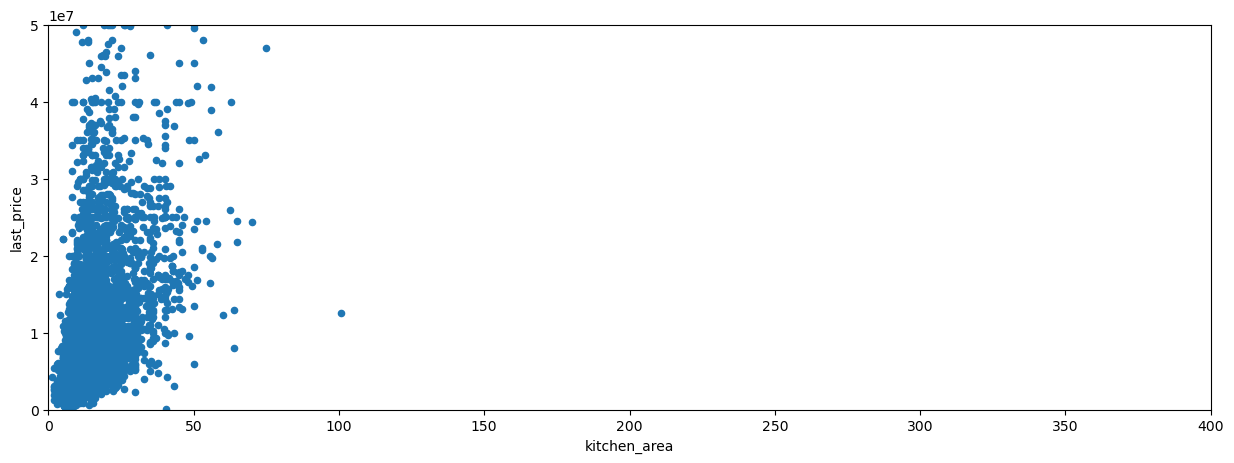

In [47]:
df.plot(x='total_area', y='last_price', kind='scatter', figsize=(15, 5), xlim=(0, 400), ylim=(0, 5e7))
df.plot(x='living_area', y='last_price', kind='scatter', figsize=(15, 5), xlim=(0, 400), ylim=(0, 5e7))
df.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(15, 5), xlim=(0, 400), ylim=(0, 5e7))

С ростом площади, стоимость квартиры ожидаемо растет

<AxesSubplot:xlabel='rooms_count_group'>

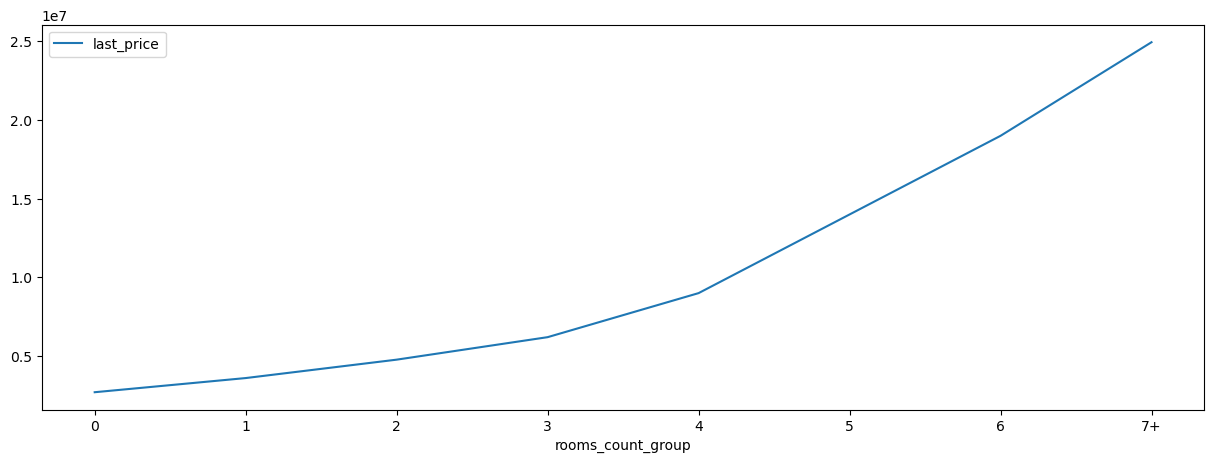

In [102]:
rooms_count_stat = pd.pivot_table(df, index='rooms_count_group', values='last_price', aggfunc='median')
rooms_count_stat.plot(figsize=(15, 5))

Ожидаемо цена растет с увеличением количества комнат

#### Зависимость цены квартиры от типа этажа:

In [49]:
pd.pivot_table(df, index='floor_group', values='last_price', aggfunc='median')

,last_price
floor_group,
другой,4850000.0
первый,3900000.0
последний,4300000.0


Стоимость квартир на первом этаже заметно ниже остальных

#### Зависимость цены квартиры от дня недели публикации объявления:

<AxesSubplot:xlabel='weekday'>

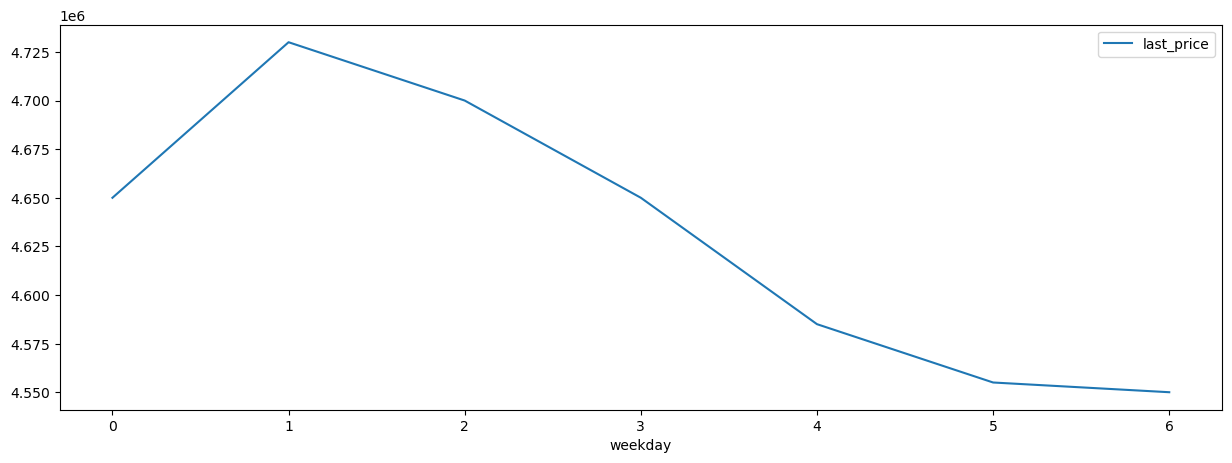

In [103]:
pd.pivot_table(df, index='weekday', values='last_price', aggfunc='median').plot(figsize=(15, 5))

Цены, в начале недели всегда ниже, чем к концу недели. 

#### Зависимость цены квартиры от месяца публикации объявления:

<AxesSubplot:xlabel='month'>

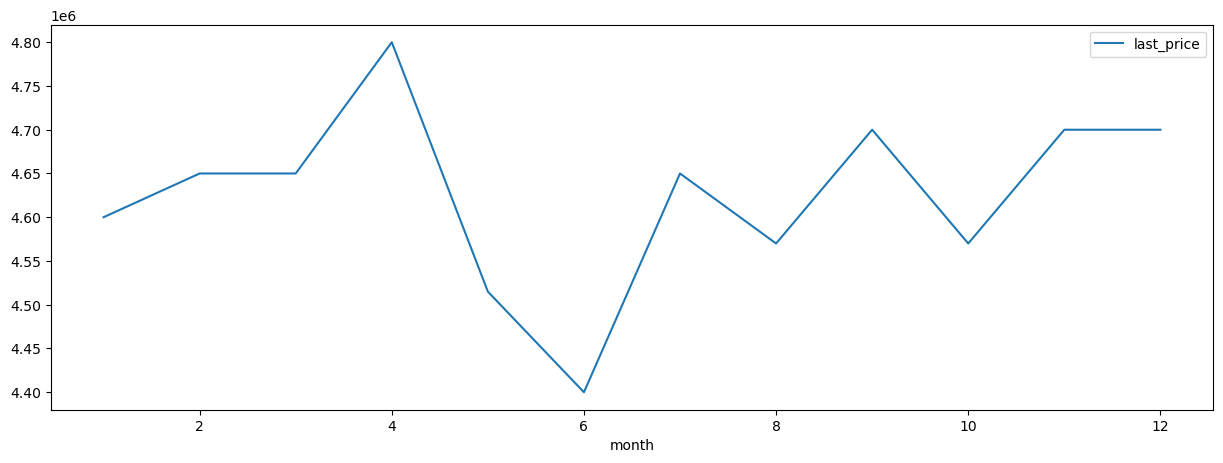

In [104]:
pd.pivot_table(df, index='month', values='last_price', aggfunc='median').plot(figsize=(15, 5))

Цены, в мае-июне ниже, чем в остальные месяцы. 

#### Зависимость цены квартиры от года публикации объявления:

<AxesSubplot:xlabel='year'>

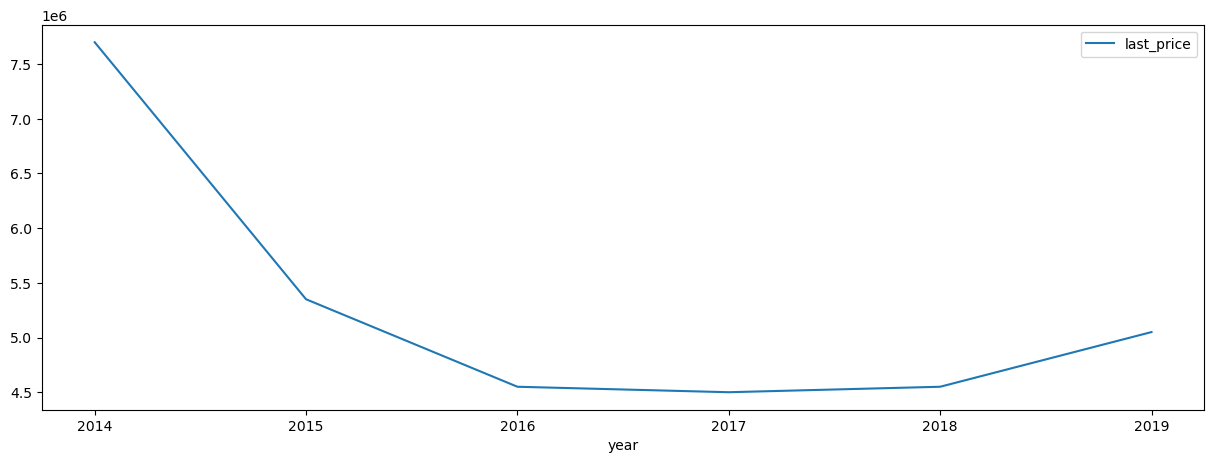

In [105]:
pd.pivot_table(df, index='year', values='last_price', aggfunc='median').plot(figsize=(15, 5))

Начиная с 2014 по 2017 год цены на квартиры снижались, после 2017 года видна тенденция на увеличение стоимости

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [97]:
cities = (df
          .groupby('clean_name')
          .agg('count')
          .sort_values(['last_price'],ascending=False)['last_price'][:10]
          .keys())
cities_prices_per_meter = pd.pivot_table(df.query('clean_name in @cities'), index='clean_name', values='price_per_meter').sort_values(by=['price_per_meter'], ascending=False)
cities_prices_per_meter

,price_per_meter
clean_name,
Санкт-Петербург,114849.008794
Пушкин,103125.819291
Кудрово,95324.930544
Парголово,90175.913458
Мурино,86087.512050
Шушары,78677.364217
Колпино,75424.579098
Гатчина,68746.146763
Всеволожск,68654.473986


<AxesSubplot:xlabel='clean_name'>

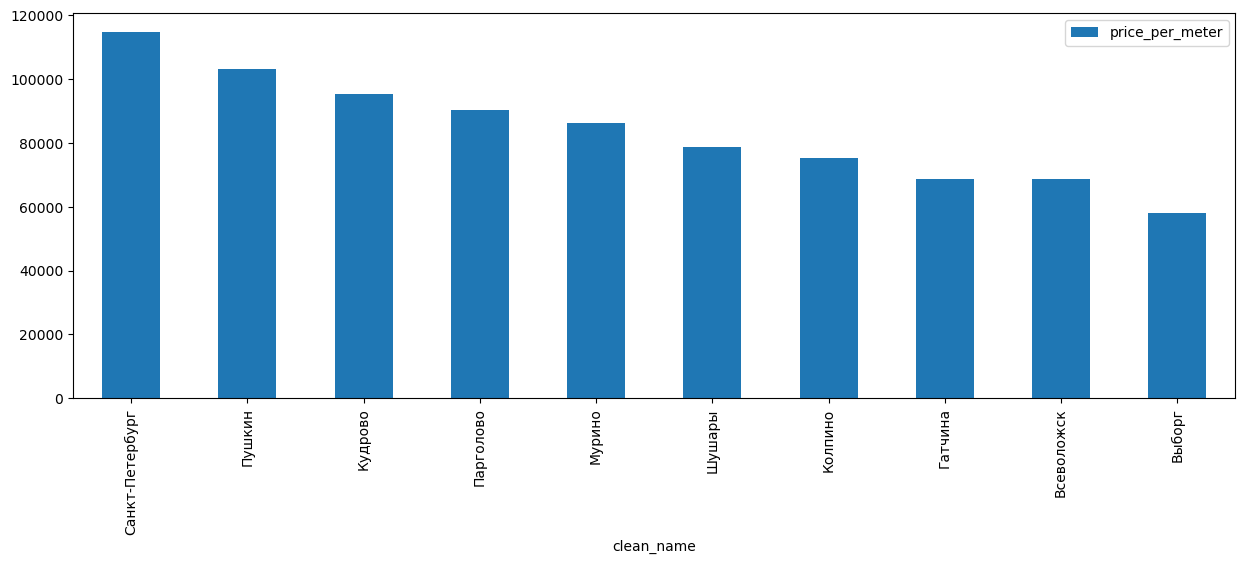

In [106]:
cities_prices_per_meter.plot(kind='bar', figsize=(15, 5))

Наиболее дорогая стоимость жилья в Санкт-Петербурге, 114'849 р. за кв. метр, наиболее доступное жилье в Выборге 58'141 р. за кв. метр

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

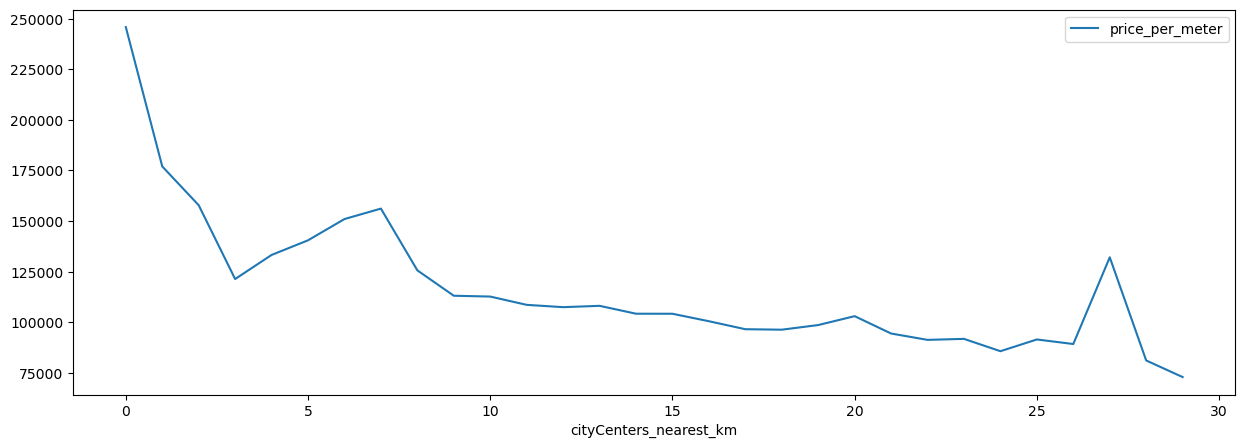

In [107]:
price_nearest_km = pd.pivot_table(df[df["clean_name"] == "Санкт-Петербург"], index='cityCenters_nearest_km', values='price_per_meter')
price_nearest_km.plot(figsize=(15, 5))

Зависмость напоминает гиперболу с некоторыми выбросами в районе 7-го и 27-го километра, возможно на этом удалении от центра расположены элитные ЖК, которые вносят аномалии. 

# Вывод

1. Был выгружен датасет с более чем 23000 объявлений о продаже квартир, содержащий 21 параметр: расстояние до ближайшего аэропорта в метрах, число балконов, высота потолков, расстояние до центра города, сколько дней было размещено объявление, дата публикации, этаж, всего этажей в доме, апартаменты, площадь кухни в квадратных метрах, цена на момент снятия с публикации, жилая площадь в квадратных метрах, название населённого пункта, свободная планировка,число парков в радиусе 3 км, расстояние до ближайшего парка, число водоёмов в радиусе 3 км, расстояние до ближайшего водоёма, число комнат, квартира-студия, общая площадь квартиры в квадратных метрах, число фотографий квартиры в объявлении
2. В ходе анализа датасета был выявлен ряд проблем:
отсутствие информации о количестве балконов
отсутствие информации о количестве парков в радиусе 3 км
отсутствие информации о количестве водоемов в радиусе 3 км
отсутствие информации о статусе апартаментов